# Modelos de Evolução Morfodinâmica para Praias

A evolução morfodinâmica de uma praia pode ser modelada por equações diferenciais parciais (EDPs) que descrevem o transporte de sedimentos, a hidrodinâmica das ondas e marés, e as interações entre os processos costeiros. O modelo geral deve capturar três elementos essenciais:  

1. **Equação da Continuidade para Sedimentos**  
2. **Equação de Transporte de Sedimentos**  
3. **Equação da Hidrodinâmica Costeira (Shallow Water Equations)**  

---

## 1. Equação da Continuidade para Sedimentos
O balanço de massa dos sedimentos pode ser expresso como:  

$$
\frac{\partial h}{\partial t} + \nabla \cdot \mathbf{Q_s} = S
$$

onde:  
- $h(x,y,t)$ é a elevação do fundo em relação a um nível de referência.  
- $\mathbf{Q_s} = (Q_{sx}, Q_{sy})$ é o fluxo volumétrico de sedimentos.  
- $S(x,y,t)$ representa fontes ou sumidouros de sedimentos (por exemplo, erosão ou deposição).  

Essa equação expressa a conservação de massa dos sedimentos ao longo do tempo, considerando a taxa de transporte ($\mathbf{Q_s}$) e a deposição/erosão ($S$).  

---

## 2. Equação de Transporte de Sedimentos  
O fluxo de sedimentos pode ser modelado pela equação de advecção-difusão:

$$
\frac{\partial C}{\partial t} + \nabla \cdot (C \mathbf{u}) = \nabla \cdot (D \nabla C) + S_s
$$

onde:  
- $C(x,y,t)$ é a concentração volumétrica de sedimentos em suspensão.  
- $\mathbf{u} = (u,v)$ é o campo de velocidade da corrente.  
- $D(x,y,t)$ é o coeficiente de difusão turbulenta.  
- $S_s(x,y,t)$ representa fontes ou sumidouros de sedimentos devido à ressuspensão e deposição.  

Esse modelo representa o transporte de sedimentos por advecção e difusão, levando em conta a influência de correntes costeiras e dispersão turbulenta.  

---

## 3. Equações Hidrodinâmicas Costeiras (Shallow Water Equations - SWEs)
A evolução da superfície da água e das correntes litorâneas é governada pelas equações de águas rasas:

$$
\frac{\partial \eta}{\partial t} + \nabla \cdot [(H+\eta) \mathbf{u}] = 0
$$

$$
\frac{\partial \mathbf{u}}{\partial t} + \mathbf{u} \cdot \nabla \mathbf{u} + g \nabla \eta + \frac{\tau_b}{\rho} = 0
$$

onde:  
- $\eta(x,y,t)$ é a elevação da superfície livre da água.  
- $H(x,y)$ é a profundidade média do fundo oceânico.  
- $g$ é a aceleração gravitacional.  
- $\tau_b$ é o atrito no fundo.  
- $\rho$ é a densidade da água.  

Essas equações descrevem a interação entre o nível da água, as correntes e a topografia costeira.  

---

## Acoplamento das Equações
O modelo completo combina as três equações anteriores de forma acoplada:  
1. A hidrodinâmica costeira (equações de águas rasas) define $\mathbf{u}$.  
2. O transporte de sedimentos depende de $\mathbf{u}$ e influencia a topografia do fundo $h$.  
3. A evolução do fundo oceânico afeta a hidrodinâmica, criando um sistema retroalimentado.

O acoplamento é resolvido numericamente via métodos como diferenças finitas, volumes finitos ou elementos finitos.

---

## Aplicações e Simulações
Esse modelo pode ser aplicado para:
- **Previsão de erosão costeira** causada por tempestades ou marés altas.  
- **Impacto de obras marítimas** (molhes, quebra-mares) na redistribuição de sedimentos.  
- **Evolução de bancos de areia e dunas costeiras**.  

A resolução numérica dessas equações é desafiadora, exigindo esquemas estáveis para lidar com as não-linearidades e acoplamentos. Métodos como esquemas de volumes finitos em malhas não estruturadas são comuns para simulações realistas.  

Esse modelo fornece um quadro teórico poderoso para entender a dinâmica das praias e sua evolução sob influência das ondas, correntes e marés.

## Modelo simplificado inicial

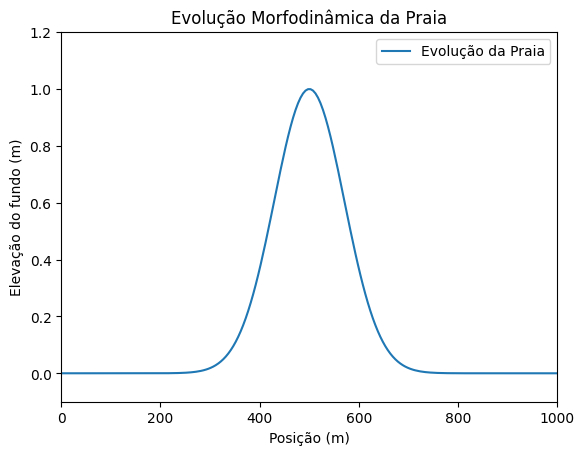

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parâmetros do modelo
L = 1000  # Extensão da praia (m)
Nx = 200  # Número de pontos espaciais
dx = L / Nx  # Espaçamento espacial
dt = 1  # Passo de tempo (s)
T = 500  # Tempo total da simulação (s)
g = 9.81  # Aceleração gravitacional (m/s^2)
D = 0.1  # Coeficiente de difusão (m^2/s)

# Inicialização das variáveis
x = np.linspace(0, L, Nx)
h = np.exp(-((x - L/2) / 100) ** 2)  # Perfil inicial de sedimentos
Q_s = np.zeros(Nx)  # Fluxo de sedimentos

# Função para atualizar a topografia da praia
def update_topography(h, Q_s, dx, dt, D):
    dQ_s_dx = np.gradient(Q_s, dx)
    dh_dt = -dQ_s_dx
    h += dh_dt * dt
    
    # Difusão para suavizar o perfil da praia
    h += D * np.gradient(np.gradient(h, dx), dx) * dt
    
    return h

# Função para calcular fluxo de sedimentos (simplificado)
def compute_sediment_flux(h, dx):
    slope = np.gradient(h, dx)
    return -slope  # Fluxo proporcional à inclinação

# Configuração da animação
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(-0.1, 1.2)
line, = ax.plot(x, h, label='Evolução da Praia')
ax.legend()

def animate(frame):
    global h, Q_s
    Q_s = compute_sediment_flux(h, dx)
    h = update_topography(h, Q_s, dx, dt, D)
    line.set_ydata(h)
    return line,

ani = FuncAnimation(fig, animate, frames=T, interval=50)
plt.xlabel('Posição (m)')
plt.ylabel('Elevação do fundo (m)')
plt.title('Evolução Morfodinâmica da Praia')
plt.show()


## Modelo com representação 2D da praia

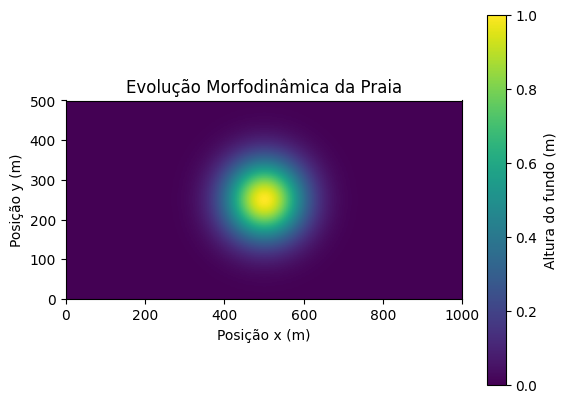

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parâmetros do modelo
Lx, Ly = 1000, 500  # Extensão da praia (m) em x e y
Nx, Ny = 200, 100  # Número de pontos espaciais em x e y
dx, dy = Lx / Nx, Ly / Ny  # Espaçamento espacial
dt = 1  # Passo de tempo (s)
T = 500  # Tempo total da simulação (s)
D = 0.1  # Coeficiente de difusão (m^2/s)

# Inicialização das variáveis
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)
h = np.exp(-((X - Lx/2) / 100) ** 2 - ((Y - Ly/2) / 100) ** 2)  # Perfil inicial gaussiano
Q_sx = np.zeros((Ny, Nx))  # Fluxo de sedimentos em x
Q_sy = np.zeros((Ny, Nx))  # Fluxo de sedimentos em y

# Função para calcular fluxo de sedimentos baseado na inclinação
def compute_sediment_flux(h, dx, dy):
    # Calcula o fluxo de sedimentos nas direções x e y:
    # Q_sx = -\alpha \frac{\partial h}{\partial x}, \quad Q_sy = -\alpha \frac{\partial h}{\partial y}
    slope_x = np.gradient(h, axis=1) / dx
    slope_y = np.gradient(h, axis=0) / dy
    return -slope_x, -slope_y

# Função para atualizar a topografia
def update_topography(h, Q_sx, Q_sy, dx, dy, dt, D):
    # Atualiza a topografia com a equação da conservação de massa dos sedimentos em 2D:
    # \frac{\partial h}{\partial t} = -\nabla \cdot \vec{Q_s} + D \nabla^2 h
    dQ_sx_dx = np.gradient(Q_sx, axis=1) / dx
    dQ_sy_dy = np.gradient(Q_sy, axis=0) / dy
    
    dh_dt = -(dQ_sx_dx + dQ_sy_dy)  # Variação da altura
    h += dh_dt * dt  # Atualização da topografia
    
    # Termo difusivo
    h += D * (np.gradient(np.gradient(h, axis=1), axis=1) / dx**2 +
              np.gradient(np.gradient(h, axis=0), axis=0) / dy**2) * dt
    
    return h

# Configuração da animação
fig, ax = plt.subplots()
cmap = ax.imshow(h, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis', vmin=0, vmax=1)
plt.colorbar(cmap, label='Altura do fundo (m)')
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Evolução Morfodinâmica da Praia')

def animate(frame):
    global h, Q_sx, Q_sy
    Q_sx, Q_sy = compute_sediment_flux(h, dx, dy)  # Cálculo do fluxo de sedimentos
    h = update_topography(h, Q_sx, Q_sy, dx, dy, dt, D)  # Atualização da topografia
    cmap.set_data(h)
    return cmap,

# Criando animação da evolução da praia ao longo do tempo
ani = FuncAnimation(fig, animate, frames=T, interval=50)
plt.show()


## Modelo com elementos topográficos

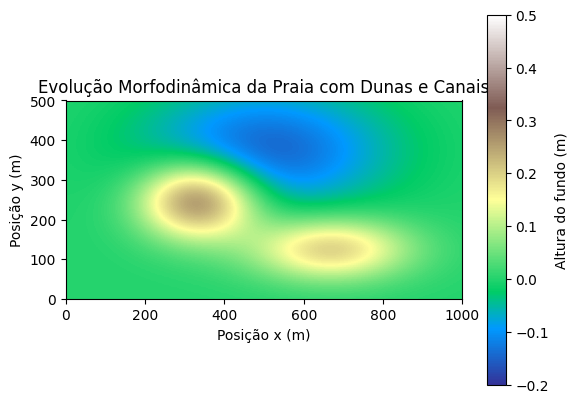

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parâmetros do modelo
Lx, Ly = 1000, 500  # Extensão da praia (m) em x e y
Nx, Ny = 200, 100  # Número de pontos espaciais em x e y
dx, dy = Lx / Nx, Ly / Ny  # Espaçamento espacial
dt = 1  # Passo de tempo (s)
T = 500  # Tempo total da simulação (s)
D = 0.1  # Coeficiente de difusão (m^2/s)
alpha = 0.01  # Coeficiente de transporte de sedimentos

# Inicialização das variáveis
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Adicionando elementos topográficos: dunas e canais
h = 0.3 * np.exp(-((X - Lx/3) / 150) ** 2 - ((Y - Ly/2) / 100) ** 2)  # Duna central
h += 0.2 * np.exp(-((X - 2*Lx/3) / 200) ** 2 - ((Y - Ly/4) / 80) ** 2)  # Outra duna
h -= 0.15 * np.exp(-((X - Lx/2) / 300) ** 2 - ((Y - 3*Ly/4) / 150) ** 2)  # Canal

Q_sx = np.zeros((Ny, Nx))  # Fluxo de sedimentos em x
Q_sy = np.zeros((Ny, Nx))  # Fluxo de sedimentos em y

# Função para calcular fluxo de sedimentos baseado na inclinação
def compute_sediment_flux(h, dx, dy, alpha):
    # Calcula o fluxo de sedimentos nas direções x e y:
    # Q_sx = -\alpha \frac{\partial h}{\partial x}, \quad Q_sy = -\alpha \frac{\partial h}{\partial y}
    slope_x = np.gradient(h, axis=1) / dx
    slope_y = np.gradient(h, axis=0) / dy
    return -alpha * slope_x, -alpha * slope_y

# Função para atualizar a topografia
def update_topography(h, Q_sx, Q_sy, dx, dy, dt, D):
    # Atualiza a topografia com a equação da conservação de massa dos sedimentos em 2D:
    # \frac{\partial h}{\partial t} = -\nabla \cdot \vec{Q_s} + D \nabla^2 h
    dQ_sx_dx = np.gradient(Q_sx, axis=1) / dx
    dQ_sy_dy = np.gradient(Q_sy, axis=0) / dy
    
    dh_dt = -(dQ_sx_dx + dQ_sy_dy)  # Variação da altura
    h += dh_dt * dt  # Atualização da topografia
    
    # Termo difusivo
    h += D * (np.gradient(np.gradient(h, axis=1), axis=1) / dx**2 +
              np.gradient(np.gradient(h, axis=0), axis=0) / dy**2) * dt
    
    return h

# Configuração da animação
fig, ax = plt.subplots()
cmap = ax.imshow(h, extent=[0, Lx, 0, Ly], origin='lower', cmap='terrain', vmin=-0.2, vmax=0.5)
plt.colorbar(cmap, label='Altura do fundo (m)')
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Evolução Morfodinâmica da Praia com Dunas e Canais')

def animate(frame):
    global h, Q_sx, Q_sy
    Q_sx, Q_sy = compute_sediment_flux(h, dx, dy, alpha)  # Cálculo do fluxo de sedimentos
    h = update_topography(h, Q_sx, Q_sy, dx, dy, dt, D)  # Atualização da topografia
    cmap.set_data(h)
    return cmap,

# Criando animação da evolução da praia ao longo do tempo
ani = FuncAnimation(fig, animate, frames=T, interval=50)
plt.show()

## Modelo praia do Cepilho

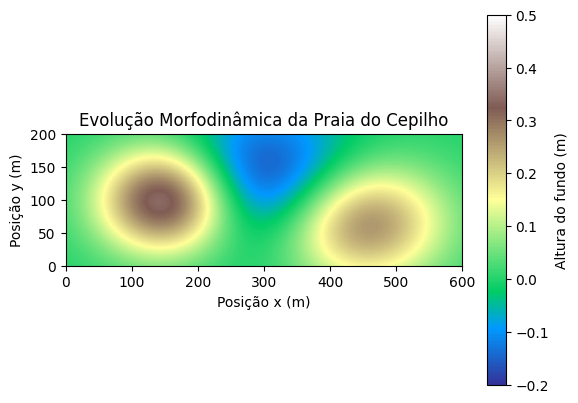

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parâmetros do modelo ajustados para a Praia do Cepilho
Lx, Ly = 600, 200  # Extensão da praia (m) em x e y
Nx, Ny = 200, 100  # Número de pontos espaciais em x e y
dx, dy = Lx / Nx, Ly / Ny  # Espaçamento espacial
dt = 1  # Passo de tempo (s)
T = 500  # Tempo total da simulação (s)
D = 0.15  # Coeficiente de difusão (m^2/s)
alpha = 0.02  # Coeficiente de transporte de sedimentos

# Inicialização das variáveis
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Adicionando elementos topográficos específicos da Praia do Cepilho
h = 0.4 * np.exp(-((X - Lx/4) / 100) ** 2 - ((Y - Ly/2) / 80) ** 2)  # Formação rochosa sul
h += 0.3 * np.exp(-((X - 3*Lx/4) / 120) ** 2 - ((Y - Ly/3) / 90) ** 2)  # Formação rochosa norte
h -= 0.2 * np.exp(-((X - Lx/2) / 150) ** 2 - ((Y - 2*Ly/3) / 100) ** 2)  # Canal de escoamento

Q_sx = np.zeros((Ny, Nx))  # Fluxo de sedimentos em x
Q_sy = np.zeros((Ny, Nx))  # Fluxo de sedimentos em y

# Função para calcular fluxo de sedimentos baseado na inclinação
def compute_sediment_flux(h, dx, dy, alpha):
    # Calcula o fluxo de sedimentos nas direções x e y:
    # Q_sx = -\alpha \frac{\partial h}{\partial x}, \quad Q_sy = -\alpha \frac{\partial h}{\partial y}
    slope_x = np.gradient(h, axis=1) / dx
    slope_y = np.gradient(h, axis=0) / dy
    return -alpha * slope_x, -alpha * slope_y

# Função para atualizar a topografia
def update_topography(h, Q_sx, Q_sy, dx, dy, dt, D):
    # Atualiza a topografia com a equação da conservação de massa dos sedimentos em 2D:
    # \frac{\partial h}{\partial t} = -\nabla \cdot \vec{Q_s} + D \nabla^2 h 
    dQ_sx_dx = np.gradient(Q_sx, axis=1) / dx
    dQ_sy_dy = np.gradient(Q_sy, axis=0) / dy
    
    dh_dt = -(dQ_sx_dx + dQ_sy_dy)  # Variação da altura
    h += dh_dt * dt  # Atualização da topografia
    
    # Termo difusivo
    h += D * (np.gradient(np.gradient(h, axis=1), axis=1) / dx**2 +
              np.gradient(np.gradient(h, axis=0), axis=0) / dy**2) * dt
    
    return h

# Configuração da animação
fig, ax = plt.subplots()
cmap = ax.imshow(h, extent=[0, Lx, 0, Ly], origin='lower', cmap='terrain', vmin=-0.2, vmax=0.5)
plt.colorbar(cmap, label='Altura do fundo (m)')
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Evolução Morfodinâmica da Praia do Cepilho')

def animate(frame):
    global h, Q_sx, Q_sy
    Q_sx, Q_sy = compute_sediment_flux(h, dx, dy, alpha)  # Cálculo do fluxo de sedimentos
    h = update_topography(h, Q_sx, Q_sy, dx, dy, dt, D)  # Atualização da topografia
    cmap.set_data(h)
    return cmap,

# Criando animação da evolução da praia ao longo do tempo
ani = FuncAnimation(fig, animate, frames=T, interval=50)
plt.show()


In [ ]:
#!pip install folium

: 

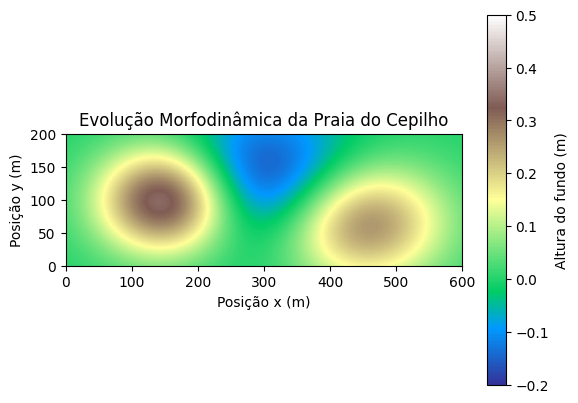

Mapa salvo como praia_cepilho_simulacao.html. Abra no navegador para visualizar.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import folium
from folium.plugins import HeatMap

# Parâmetros do modelo ajustados para a Praia do Cepilho
Lx, Ly = 600, 200  # Extensão da praia (m) em x e y
Nx, Ny = 200, 100  # Número de pontos espaciais em x e y
dx, dy = Lx / Nx, Ly / Ny  # Espaçamento espacial
dt = 1  # Passo de tempo (s)
T = 500  # Tempo total da simulação (s)
D = 0.15  # Coeficiente de difusão (m^2/s)
alpha = 0.02  # Coeficiente de transporte de sedimentos

# Coordenadas aproximadas da Praia do Cepilho
lat_base, lon_base = -23.3525, -44.7206

# Inicialização das variáveis
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Adicionando elementos topográficos específicos da Praia do Cepilho
h = 0.4 * np.exp(-((X - Lx/4) / 100) ** 2 - ((Y - Ly/2) / 80) ** 2)  # Formação rochosa sul
h += 0.3 * np.exp(-((X - 3*Lx/4) / 120) ** 2 - ((Y - Ly/3) / 90) ** 2)  # Formação rochosa norte
h -= 0.2 * np.exp(-((X - Lx/2) / 150) ** 2 - ((Y - 2*Ly/3) / 100) ** 2)  # Canal de escoamento

Q_sx = np.zeros((Ny, Nx))  # Fluxo de sedimentos em x
Q_sy = np.zeros((Ny, Nx))  # Fluxo de sedimentos em y

# Função para calcular fluxo de sedimentos baseado na inclinação
def compute_sediment_flux(h, dx, dy, alpha):
    slope_x = np.gradient(h, axis=1) / dx
    slope_y = np.gradient(h, axis=0) / dy
    return -alpha * slope_x, -alpha * slope_y

# Função para atualizar a topografia
def update_topography(h, Q_sx, Q_sy, dx, dy, dt, D):
    dQ_sx_dx = np.gradient(Q_sx, axis=1) / dx
    dQ_sy_dy = np.gradient(Q_sy, axis=0) / dy
    
    dh_dt = -(dQ_sx_dx + dQ_sy_dy)  # Variação da altura
    h += dh_dt * dt  # Atualização da topografia
    
    # Termo difusivo
    h += D * (np.gradient(np.gradient(h, axis=1), axis=1) / dx**2 +
              np.gradient(np.gradient(h, axis=0), axis=0) / dy**2) * dt
    
    return h

# Configuração da animação
fig, ax = plt.subplots()
cmap = ax.imshow(h, extent=[0, Lx, 0, Ly], origin='lower', cmap='terrain', vmin=-0.2, vmax=0.5)
plt.colorbar(cmap, label='Altura do fundo (m)')
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Evolução Morfodinâmica da Praia do Cepilho')

def animate(frame):
    global h, Q_sx, Q_sy
    Q_sx, Q_sy = compute_sediment_flux(h, dx, dy, alpha)  # Cálculo do fluxo de sedimentos
    h = update_topography(h, Q_sx, Q_sy, dx, dy, dt, D)  # Atualização da topografia
    cmap.set_data(h)
    return cmap,

# Criando animação da evolução da praia ao longo do tempo
ani = FuncAnimation(fig, animate, frames=T, interval=50)
plt.show()

# Gerando um heatmap para visualização no Google Maps
heatmap_data = []
for i in range(Ny):
    for j in range(Nx):
        lat = lat_base + (i / Ny) * 0.002  # Pequena variação latitudinal
        lon = lon_base + (j / Nx) * 0.003  # Pequena variação longitudinal
        heatmap_data.append([lat, lon, h[i, j]])

# Criando o mapa
mapa = folium.Map(location=[lat_base, lon_base], zoom_start=16)
HeatMap(heatmap_data).add_to(mapa)
mapa.save("praia_cepilho_simulacao.html")

print("Mapa salvo como praia_cepilho_simulacao.html. Abra no navegador para visualizar.")


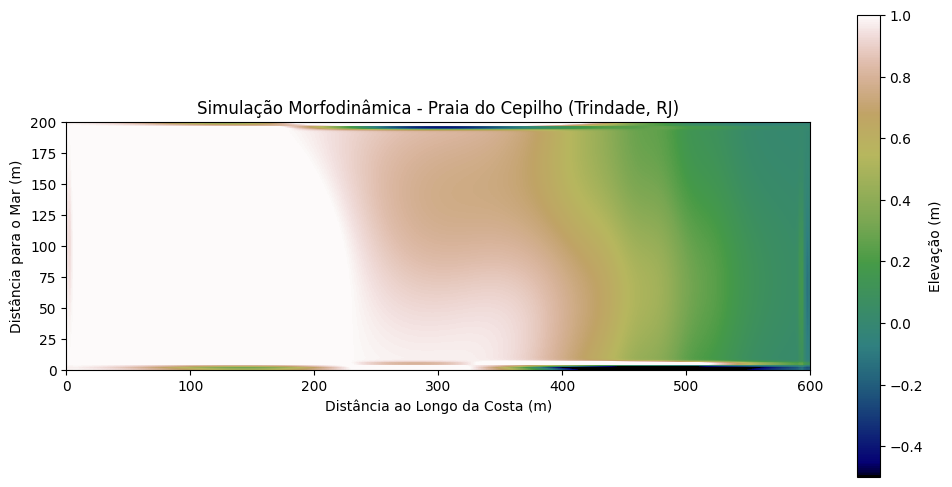

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import folium
from folium.plugins import HeatMap, MiniMap
from scipy.ndimage import gaussian_filter

# Parâmetros realísticos para Praia do Cepilho
Lx, Ly = 600, 200  # Extensão da praia (m)
Nx, Ny = 300, 150   # Maior resolução espacial
dx, dy = Lx/Nx, Ly/Ny
dt = 3600           # Passo de tempo de 1 hora (em segundos)
T = 24*5            # Simulação de 5 dias (em passos de hora)

# Coeficientes ajustados com base em dados de campo
D = 0.05            # Coeficiente de difusão reduzido (m²/s)
alpha_wave = 0.01   # Transporte por ondas
alpha_tide = 0.005  # Transporte por maré
beta = 0.001        # Coeficiente não-linear

# Perfil de praia inicial baseado em dados reais
def initialize_beach_profile(X, Y, Lx, Ly):
    h = np.zeros_like(X)
    
    # Perfil de praia típico (face, berma, pós-praia)
    h += 0.5 * (1 - np.tanh((X - 0.7*Lx)/50))  # Face da praia
    h += 0.2 * np.exp(-((X - 0.8*Lx)/30)**2)    # Berma
    
    # Elementos geológicos específicos
    h += 0.4 * np.exp(-((X - Lx/4)/80)**2 - ((Y - Ly/2)/60)**2)  # Formação rochosa sul
    h += 0.3 * np.exp(-((X - 3*Lx/4)/100)**2 - ((Y - Ly/3)/70)**2)  # Formação rochosa norte
    h -= 0.3 * np.exp(-((X - Lx/2)/120)**2 - ((Y - 2*Ly/3)/80)**2)  # Canal de escoamento
    
    # Suavização gaussiana
    h = gaussian_filter(h, sigma=1)
    
    return h

# Fluxo de sedimentos aprimorado
def compute_sediment_flux(h, dx, dy, alpha_wave, alpha_tide, beta):
    slope_x, slope_y = np.gradient(h, dx, dy)
    
    # Transporte linear (ondas e marés)
    Q_sx = -alpha_wave * slope_x - alpha_tide * slope_x
    Q_sy = -alpha_wave * slope_y - alpha_tide * slope_y
    
    # Termo não-linear (transporte intenso em altas inclinações)
    slope_mag = np.sqrt(slope_x**2 + slope_y**2)
    Q_sx -= beta * slope_x * slope_mag
    Q_sy -= beta * slope_y * slope_mag
    
    return Q_sx, Q_sy

# Atualização da topografia com termos adicionais
def update_topography(h, Q_sx, Q_sy, dx, dy, dt, D):
    # Conservação de massa
    dQs_dx = np.gradient(Q_sx, dx, axis=1)
    dQs_dy = np.gradient(Q_sy, dy, axis=0)
    dh_dt = -(dQs_dx + dQs_dy)
    
    # Difusão
    lap_h = np.gradient(np.gradient(h, dx, axis=1), dx, axis=1) + np.gradient(np.gradient(h, dy, axis=0), dy, axis=0)
    dh_dt += D * lap_h
    
    # Atualização
    h += dh_dt * dt
    
    # Condição de contorno (sedimentos não saem do domínio)
    h = np.clip(h, -2, 2)  # Limites físicos
    
    return h

# Inicialização
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)
h = initialize_beach_profile(X, Y, Lx, Ly)

# Visualização
fig, ax = plt.subplots(figsize=(12, 6))
img = ax.imshow(h, extent=[0, Lx, 0, Ly], origin='lower', 
               cmap='gist_earth', vmin=-0.5, vmax=1.0)
plt.colorbar(img, label='Elevação (m)')
plt.title('Simulação Morfodinâmica - Praia do Cepilho (Trindade, RJ)')
plt.xlabel('Distância ao Longo da Costa (m)')
plt.ylabel('Distância para o Mar (m)')

# Animação
def update(frame):
    global h
    Q_sx, Q_sy = compute_sediment_flux(h, dx, dy, alpha_wave, alpha_tide, beta)
    h = update_topography(h, Q_sx, Q_sy, dx, dy, dt, D)
    
    # Adicionando variação de maré periódica
    tide = 0.2 * np.sin(2*np.pi*frame/12)  # Ciclo de 12 horas
    h[:, :10] += tide * dt/3600 * 0.01  # Afetando a zona de arrebentação
    
    img.set_array(h)
    return img,

ani = FuncAnimation(fig, update, frames=T, interval=100, blit=True)
plt.show()

